#Importing Libries

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from machine import Logistic_Regression 
import pickle

Infomation about the data 

In [6]:
 df = pd.read_csv('heart.csv')
 df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
df.shape

(270, 14)

In [8]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
# checking if our data has some missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

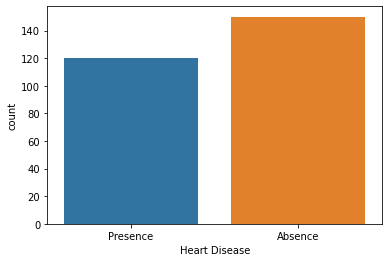

In [10]:
#Visualization
sns.countplot(x="Heart Disease", data =df)

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

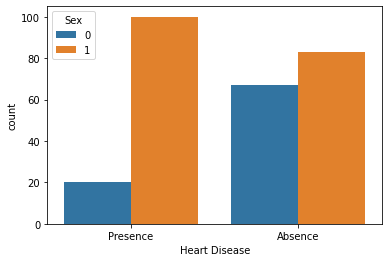

In [11]:
sns.countplot(x="Heart Disease", hue ="Sex",  data =df)

<AxesSubplot:ylabel='Frequency'>

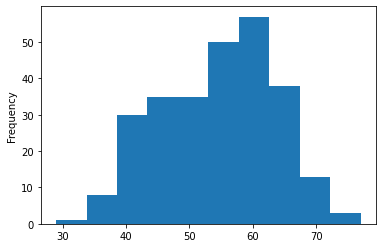

In [12]:
df['Age'].plot.hist()

Data PreProcessing

In [13]:
# One-hot encoding
df['Heart Disease']= pd.get_dummies(df['Heart Disease'],drop_first = True)
df.head()
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [14]:
#checking for missing value
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Splitting the Feature and target value 

In [15]:
##Splitting into features (X) and target  (Y)
X = df.drop(['Heart Disease'], axis = 1 )
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [16]:
Y = df['Heart Disease']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: uint8

Splitting our dataset to training and testing data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test =  train_test_split(X,Y , test_size =0.3 , random_state =1)

In [18]:
print(X_train.shape, Y_train.shape)

(189, 13) (189,)


Logistic Regression

In [19]:

class Logistic_Regression ():
  
  # declaring learning rate and number of iteration(Hyperparameters)
  def __init__(self,learning_rate,no_of_iteration):

    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration


  # fit the function to train our model with the dataset 
  def fit(self,X,Y):

    # no of data points in the dataset (number of rows) ==> m
    # no of input features in the dataset (number of columns )==> n
    self.m , self.n = X.shape

    #initiate the weight and bais value 
    self.w = np.zeros(self.n)
    self.b = 0

    self.X = X
    self.Y = Y

    # implementing gradient descent 
    for i in range(self.no_of_iteration):
      self.update_weight()


  def update_weight(self):

    # we need the formular for y_hat first (sigma function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b) ))  # wx + b

    # for the derivatives

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y)) # taking the transpose number of column of one matrix should match no of row in the next
                                                       # X = [270 x 13]  Y = [270 x 1]

    db = (1/self.m)*np.sum(Y_hat - self.Y)
    
    # updating the weight and bais using gradient descent equation

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db

    # Sigmoid Equation & Decision Boundary
  def predict(self, X):  
    
    Y_pred =  1 / (1 + np.exp( - (X.dot(self.w) + self.b) )) 
    Y_pred = np.where(Y_pred > 0.5 , 1 , 0)
    return Y_pred


In [20]:
print(X_train.shape, Y_train.shape)

(189, 13) (189,)


Model pipelining with scaler and logistic regression

In [21]:
from sklearn.pipeline import Pipeline
steps = [(("standard_scaler"),StandardScaler()),
         ("classifier", Logistic_Regression(learning_rate=0.01, no_of_iteration=100))]

In [22]:
pipe = Pipeline(steps)
from sklearn import set_config
set_config(display = "diagram")
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier',
                 <__main__.Logistic_Regression object at 0x7f9a78c3ef70>)])

Fitting Our Model

In [23]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier',
                 <__main__.Logistic_Regression object at 0x7f9a78c3ef70>)])

Model Evaluation

In [24]:
pred_test = pipe.predict(X_test)
pred_train = pipe.predict(X_train)

Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(Y_test, pred_test)
training_data_accuracy = accuracy_score(Y_train, pred_train)

In [26]:
print('Accuracy score of test data : ', test_data_accuracy )
print('Accuracy score of training data : ', training_data_accuracy )

Accuracy score of test data :  0.8148148148148148
Accuracy score of training data :  0.8465608465608465


Algorithm Accuracy

In [27]:
def algo_accuracy(y_test,pred):
  conf_matrix = confusion_matrix(Y_test,pred)
  precision  = precision_score(Y_test,pred)
  recall = recall_score(Y_test,pred)

  return conf_matrix , precision , recall

In [28]:
algo_accuracy(Y_test , pred_test)

(array([[36,  6],
        [ 9, 30]]),
 0.8333333333333334,
 0.7692307692307693)

Model Comparison

In [29]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:

#knn = KNeighborsClassifier(n_neighbors=3)
#decision_tree = DecisionTreeClassifier(max_depth=5)
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Scale the target (Y_train) if needed
# Y_train_scaled = scaler.fit_transform(Y_train)

# Define the classifiers
knn = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the classifiers with the scaled training data
knn.fit(X_train_scaled, Y_train)
decision_tree.fit(X_train_scaled, Y_train)

# Evaluate the performance of each classifier on the test data
knn_score = knn.score(scaler.transform(X_test), Y_test)
decision_tree_score = decision_tree.score(scaler.transform(X_test), Y_test)

print("K-Nearest Neighbors Accuracy:", knn_score)
print("Decision Tree Accuracy:", decision_tree_score)


K-Nearest Neighbors Accuracy: 0.8148148148148148
Decision Tree Accuracy: 0.7654320987654321


Build model 

In [ ]:
## Definition
input_data = (59,1,1,140,221,0,1,164,1,0.0,2,0,2)

# change the input data to numpy array before we can make prediction on it
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardize the input data

prediction = pipe.predict(input_data_reshaped) #model is chnaged to pipe

print(prediction)

if (prediction[0] == 0):
  print('The person does not have Heart Disease')
else:
  print('The person has Heart Disease')


[0]
The person does not have Heart Disease


/Users/lagudaadeyemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the model 

In [ ]:
filename = 'trained_model.pkl'
pickle.dump(pipe,open(filename,'wb')) 

In [ ]:
loaded_model = pickle.load(open('trained_model.pkl','rb'))

In [ ]:
input_data = (55,0,1,120,244,0,1,162,0,1.1,2,0,2)

# change the input data to numpy array before we can make prediction on it
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person does not have Heart Disease')
else:
  print('The person has Heart Disease')


[0]
The person does not have Heart Disease


/Users/lagudaadeyemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
